In [791]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from functools import reduce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(len(df))
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv", index_col=None, header=0)

#frame = frame.drop(columns = ["Unit (all except Population)", "Categories", "Items", "Undernourished"])
frame = frame.drop(columns = ["Unit (all except Population)", "Undernourished"])
#Simon à détécter
#Relier nombre population 
#Using miss rangeer

#frame = pd.get_dummies(frame)
"""
frame["Undernourished"] = frame["Undernourished"].replace('<2.5','2.5')
frame['Undernourished'].value_counts()
"""
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ["Recovered_percent",'Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ["Recovered_percent"]
data_food =  set(frame.columns) - set(data_covid)


print(len(frame))
frame = frame.dropna()
print(len(frame))

151
151
170
151
170
23
170
151
151
170
56
151
170
160


In [792]:
frame["Confirmed_finish"] = frame["Confirmed"] - frame["Active"]
frame["Recovered_percent"] = frame["Recovered"] * 100 / frame["Confirmed_finish"] 
frame["Deaths_percent"] = frame["Deaths"] * 100 / frame["Confirmed_finish"] 
print(len(frame))
frame = frame.dropna()
print(len(frame))

160
159


In [793]:
name_y = "Confirmed"

In [794]:
frame.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Confirmed_finish,Recovered_percent,Deaths_percent
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,0.112646,0.004226,0.090667,0.017753,38928000.0,0.094893,95.546833,4.453167
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,1.051339,0.022763,0.500916,0.527660,2838000.0,0.523679,95.653344,4.346656
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,0.159229,0.004973,0.104439,0.049816,44357000.0,0.109412,95.454545,4.545455
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,0.042808,0.001021,0.020365,0.021422,32522000.0,0.021386,95.226456,4.773544
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,0.141837,0.004082,0.129592,0.008163,98000.0,0.133673,96.946565,3.053435


In [795]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


In [780]:
name_y

'Obesity'

import time 
time.sleep(4600)
!poweroff

In [796]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Deaths_percent', 'Recovered_percent', 'Confirmed_finish']

frame_cov = frame[data_covid].sort_values("Confirmed", ascending=True)
frame_food = frame.drop(columns=data_covid + ["Country"])

(array([76., 20., 21., 10.,  8., 10.,  6.,  3.,  1.,  4.]),
 array([3.45208506e-04, 4.74289845e-01, 9.48234482e-01, 1.42217912e+00,
        1.89612376e+00, 2.37006839e+00, 2.84401303e+00, 3.31795767e+00,
        3.79190230e+00, 4.26584694e+00, 4.73979158e+00]),
 <BarContainer object of 10 artists>)

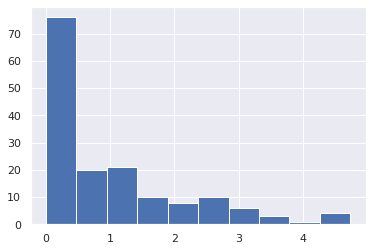

In [797]:
a = plt.hist(frame_cov["Confirmed"])
a

In [798]:
inds = []
prec = 0
grouped_index = []
cpt = 0
fus = []
for i in a[0]:
    if cpt < 3:
        fus += list(frame_cov[int(prec):int(prec+i)].index.values)
    cpt += 1
    #print(i)
    print(frame_cov[int(prec):int(prec+i)].index.values)
    grouped_index.append(frame_cov[int(prec):int(prec+i)].index.values)    
    prec += i
    
grouped_index[0 : 3] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[0 : 3])] 
#grouped_index[1 : ] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[1 : ])] 
grouped_index

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132]
[154 106  47  45 115  40  86  46  63  37  68  60  78 153 107  58 100   9
 103 144]
[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]
[ 77 158  21  66  87  97 137  23  10 145]
[125 122  74 159  35  95 123  18]
[114  55  31  33   8 116 124 108 138  20]
[120  83   5 141 146  51]
[161 118  73]
[6]
[ 38  91 102  14]


[array([ 85, 160, 166,  24, 139, 150,  49, 112, 149,  30, 167,  28,  22,
        101,  96,  16, 136,  89,  93,  59, 113, 151, 143, 128, 156,  99,
        110, 127,   3, 104,  82, 169,  92,  36, 130,  34,  64, 142,  25,
        111,  12,  48, 168,  41, 134,  88,  76, 129,  61,  27,   7,  44,
          0, 162, 148,  62,  79,   4,  54,  94,   2,  57, 117,  98,  69,
        163,  11,  32, 165,  75,  50, 121,  19,  53, 152, 132, 154, 106,
         47,  45, 115,  40,  86,  46,  63,  37,  68,  60,  78, 153, 107,
         58, 100,   9, 103, 144,  70, 133, 119,  84,  43,  56,  65,   1,
         39,  15,  17,  13, 140,  42,  71, 126,  72,  90, 157, 135,  67]),
 array([ 77, 158,  21,  66,  87,  97, 137,  23,  10, 145]),
 array([125, 122,  74, 159,  35,  95, 123,  18]),
 array([114,  55,  31,  33,   8, 116, 124, 108, 138,  20]),
 array([120,  83,   5, 141, 146,  51]),
 array([161, 118,  73]),
 array([6]),
 array([ 38,  91, 102,  14])]

In [799]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]

matrix = frame.drop(columns=(['Population','Country'])).corr()[data_covid]

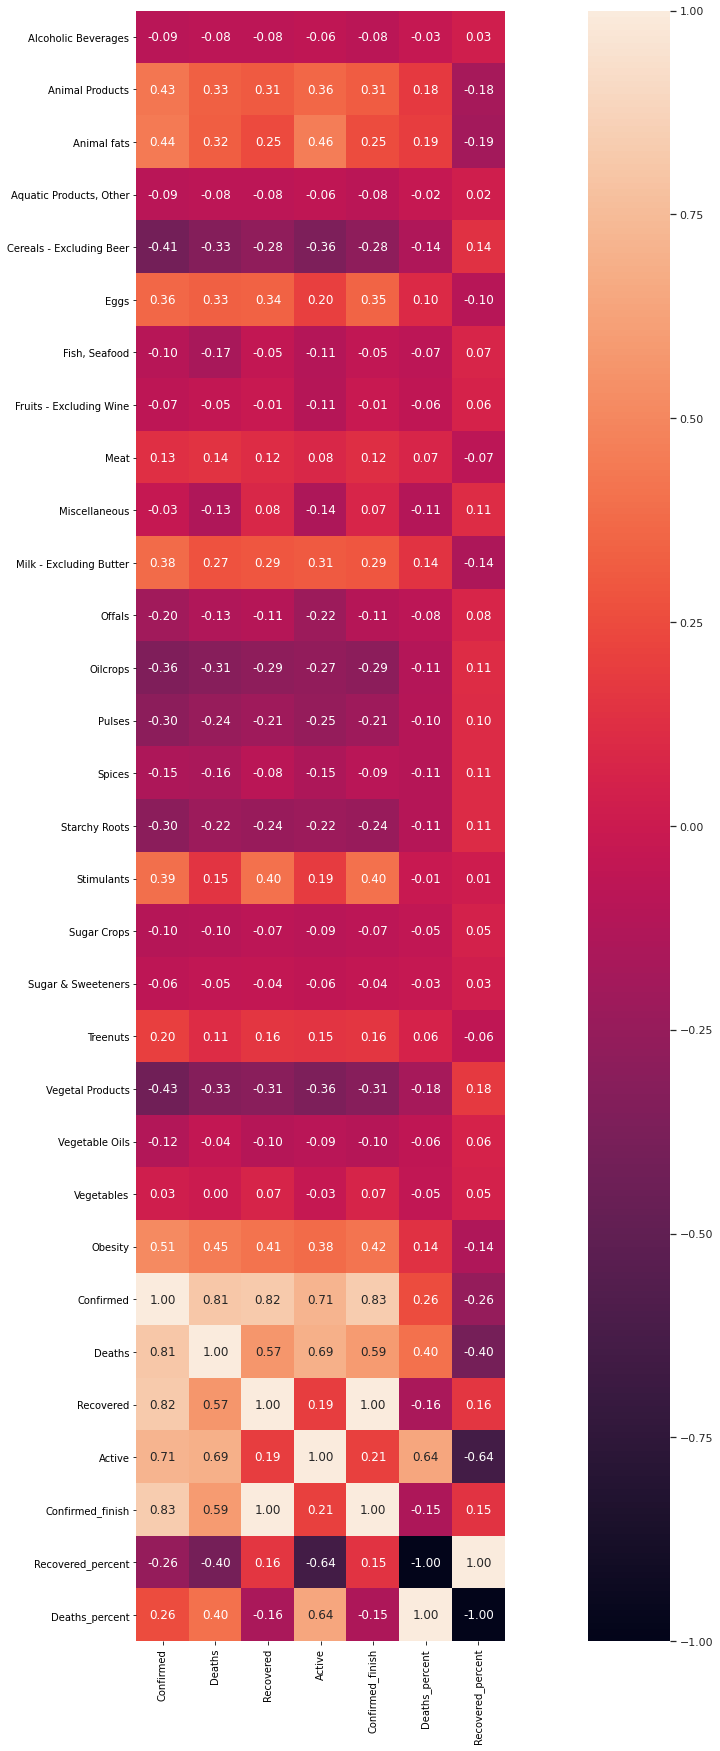

In [16]:
#Affichage
#plot correlation seaborn
from matplotlib import pyplot
import seaborn

a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=frame.drop(columns=(['Population','Country'])).corr().columns, xticklabels=matrix.columns)



In [741]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Spices", 
                                 "Confirmed_finish", "Recovered", "Deaths_percent", "Recovered_percent"])


In [742]:
frame_food

,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Obesity
0,0.0000,6.2224,0.0000,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.0490,0.0980,0.0000,0.0000,0.7513,17.0831,0.3593,4.5
1,0.0000,3.4172,0.0000,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0510,0.5270,0.0000,0.0000,0.9181,9.2443,0.6503,22.3
2,0.0000,0.8972,0.0000,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1129,0.2886,0.0000,0.0000,0.8595,27.3606,0.5145,26.6
3,0.0000,1.3130,0.0000,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.7078,0.1128,0.0000,0.0000,0.0308,22.4638,0.1231,6.8
4,0.0000,4.6686,0.0000,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.0449,1.0549,0.0000,0.0000,0.2020,14.4436,0.2469,19.1
5,0.0000,3.3076,0.0000,1.3316,1.5706,0.1664,0.2091,19.2693,0.0000,5.8512,0.1878,0.0640,0.0213,0.1110,0.2475,0.0000,0.0000,0.1366,17.3147,0.1878,28.5
6,0.0000,6.2619,0.0000,2.5068,1.6196,0.2218,0.5468,10.8165,0.0361,10.4709,0.2734,0.6602,0.0774,0.0567,1.8002,0.0000,0.0000,0.9542,12.8127,0.8717,20.9
7,0.0000,4.6030,0.0000,0.9908,0.7017,0.4515,0.4028,11.6002,0.0520,6.5196,0.2339,1.2929,0.0260,0.0422,0.7926,0.0000,0.0000,1.6145,20.3612,0.2144,30.4
8,0.0000,12.8517,0.0000,1.2297,1.2147,0.4259,0.2249,8.1099,0.0000,5.1497,0.0750,1.1367,0.0120,0.0450,0.4439,0.0000,0.0000,0.8398,17.9323,0.2039,21.9
9,0.0000,7.7987,0.0000,5.4481,2.0197,0.2122,0.5940,11.9993,0.0170,9.9202,0.1612,0.1867,0.0255,0.1697,1.3663,0.0000,0.0000,2.2573,7.1538,0.6534,19.9


In [544]:
#supprimer valeur abberante:
from scipy import stats
z_scores = stats.zscore(frame_food)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
frame_food = frame_food[filtered_entries]

for i in new_df.columns:
    print(i)
    new_df[i].hist()
    plt.show()

In [545]:
frame_food

,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Obesity
0,0.0,6.2224,0.0000,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.0490,0.0980,0.0000,0.0000,0.7513,17.0831,0.3593,4.5
2,0.0,0.8972,0.0000,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1129,0.2886,0.0000,0.0000,0.8595,27.3606,0.5145,26.6
3,0.0,1.3130,0.0000,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.7078,0.1128,0.0000,0.0000,0.0308,22.4638,0.1231,6.8
4,0.0,4.6686,0.0000,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.0449,1.0549,0.0000,0.0000,0.2020,14.4436,0.2469,19.1
5,0.0,3.3076,0.0000,1.3316,1.5706,0.1664,0.2091,19.2693,0.0000,5.8512,0.1878,0.0640,0.0213,0.1110,0.2475,0.0000,0.0000,0.1366,17.3147,0.1878,28.5
6,0.0,6.2619,0.0000,2.5068,1.6196,0.2218,0.5468,10.8165,0.0361,10.4709,0.2734,0.6602,0.0774,0.0567,1.8002,0.0000,0.0000,0.9542,12.8127,0.8717,20.9
7,0.0,4.6030,0.0000,0.9908,0.7017,0.4515,0.4028,11.6002,0.0520,6.5196,0.2339,1.2929,0.0260,0.0422,0.7926,0.0000,0.0000,1.6145,20.3612,0.2144,30.4
8,0.0,12.8517,0.0000,1.2297,1.2147,0.4259,0.2249,8.1099,0.0000,5.1497,0.0750,1.1367,0.0120,0.0450,0.4439,0.0000,0.0000,0.8398,17.9323,0.2039,21.9
9,0.0,7.7987,0.0000,5.4481,2.0197,0.2122,0.5940,11.9993,0.0170,9.9202,0.1612,0.1867,0.0255,0.1697,1.3663,0.0000,0.0000,2.2573,7.1538,0.6534,19.9
11,0.0,1.2369,0.0000,6.9946,1.2664,2.1646,0.4270,1.8407,0.0147,3.2249,0.1178,0.6332,0.5448,0.2209,0.0295,0.0147,0.0000,0.2651,29.6422,0.3092,3.4


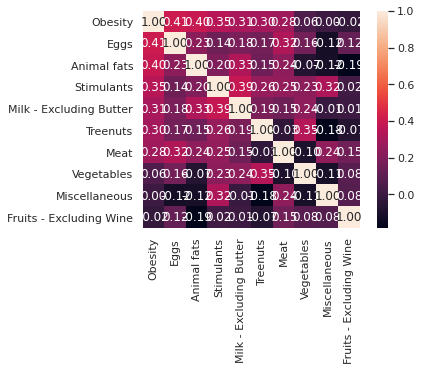

In [546]:
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


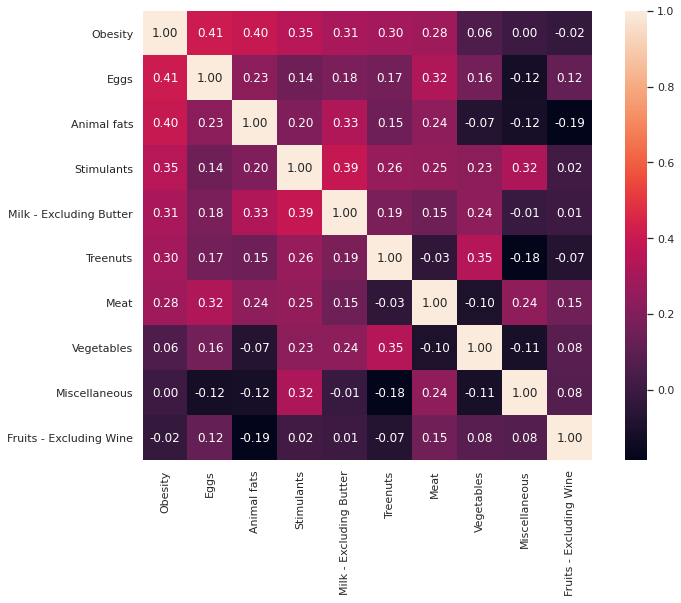

In [547]:

from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


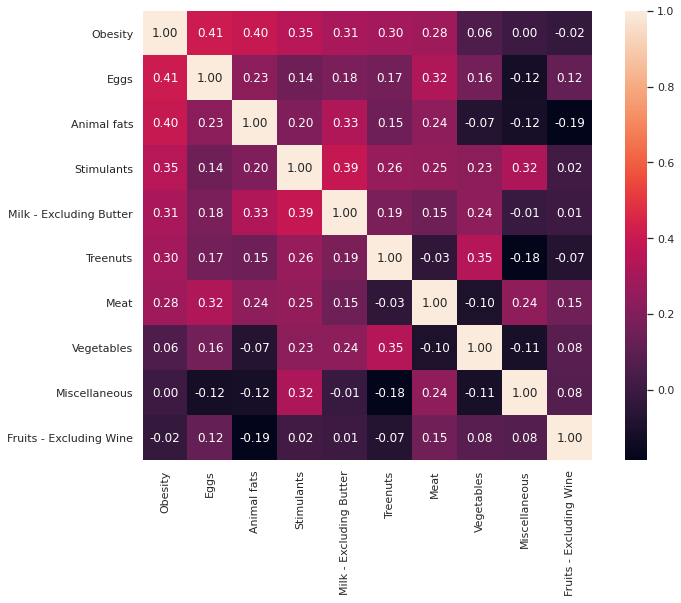

In [548]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [125]:
frame_food[columns[0:7] + ["Obesity"]]

KeyError: "None of [Index(['Recovered_percentObesity', 'MiscellaneousObesity', 'SpicesObesity', 'Fruits - Excluding WineObesity', 'StimulantsObesity', 'VegetablesObesity', 'Starchy RootsObesity'], dtype='object')] are in the [columns]"

In [126]:
frame_food

,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Obesity,Recovered_percent
160,0.0,1.5442,0.0000,4.2140,0.0744,0.4558,0.2698,3.0140,0.0000,2.5023,0.0000,8.3628,1.0233,0.1302,0.7163,0.0279,0.0000,0.0000,0.3628,27.0605,0.2419,7.1,89.705882
150,0.0,2.0345,0.0000,10.2168,0.2446,0.7893,1.3007,14.5525,0.1112,0.1779,0.0889,3.5353,0.2779,0.1445,0.1779,0.2001,0.0000,0.0000,0.0111,15.9644,0.1668,2.9,100.000000
49,0.0,7.6883,0.0000,1.5114,0.5773,1.4694,0.0840,8.4230,0.0262,1.7948,0.0945,8.9635,0.2991,0.1312,0.3569,0.4408,0.0000,0.0000,0.1469,17.8168,0.1732,30.0,94.117647
30,0.0,3.4468,0.0097,2.5989,2.3066,0.9817,0.2344,21.6062,0.1517,2.2156,0.4784,1.8351,0.0234,0.0676,0.0565,0.9362,0.0000,0.0179,1.7979,10.6590,0.5763,6.6,94.814199
167,0.0,2.0131,0.0000,11.5271,0.5514,0.3847,0.2564,8.0010,0.0256,1.3463,0.2436,0.7565,0.5001,0.1026,0.0513,0.3718,0.0000,0.0000,0.0769,23.6312,0.1667,14.1,70.009881
22,0.0,0.5981,0.0000,10.5524,0.4061,0.3692,0.0443,3.5741,0.0148,2.1636,0.1255,11.9406,0.5391,0.0960,0.0369,0.0222,0.0000,0.0000,0.2658,19.1774,0.0665,4.5,97.322835
96,0.0,1.2195,0.0000,12.0873,0.1327,0.4065,0.2987,5.6745,0.0249,9.7146,0.3152,3.3765,0.5475,0.1244,0.1327,0.0332,0.0000,0.0000,1.3357,14.1945,0.3816,7.1,95.486556
136,0.0,0.1678,0.0000,3.2063,0.2983,1.2117,0.2610,2.0412,0.0373,2.1996,0.0746,4.8560,0.4660,0.2889,0.4474,0.0746,0.0000,0.0000,0.0559,34.0479,0.2703,7.5,96.099104
89,0.0,0.4154,0.0000,3.3592,0.2528,0.3702,0.1445,6.0051,0.0361,0.2438,0.1355,1.5803,0.0361,0.0000,0.3070,0.1174,0.0000,0.0000,0.3883,36.4186,0.1896,8.6,94.184397
59,0.0,2.4889,0.0000,1.4883,1.4440,1.2856,2.8436,12.9576,0.1267,4.8195,0.0823,3.3186,0.1900,0.8803,0.0697,0.8740,0.0000,0.0000,0.1393,16.8841,0.1077,20.2,100.000000


# Meilleur regression avec groupby

# XGBregressor

['Recovered_percent',
 'Miscellaneous',
 'Spices',
 'Fruits - Excluding Wine',
 'Stimulants',
 'Obesity']

In [127]:
current_frame

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Confirmed_finish,Recovered_percent,Deaths_percent
85,Lao People's Democratic Republic,0.0000,21.6306,3.9594,0.0000,9.0989,0.4974,1.6871,0.8777,15.0283,0.0878,0.2243,0.2243,5.6076,0.1365,1.0435,0.3121,0.0780,0.1853,0.0000,0.0683,28.3792,9.7620,1.1118,4.5,0.000345,0.000000,0.000318,0.000028,7.242000e+06,0.000318,100.000000,0.000000
160,United Republic of Tanzania,0.0000,7.5907,1.5442,0.0000,4.2140,0.0744,0.4558,0.2698,3.0140,0.0000,2.5023,0.0000,8.3628,1.0233,0.1302,0.7163,0.0279,0.0000,0.0000,0.3628,42.4093,27.0605,0.2419,7.1,0.000852,0.000035,0.000306,0.000511,5.973400e+07,0.000342,89.705882,10.294118
166,Vietnam,0.0000,33.2484,3.8238,0.0000,3.7155,0.7839,1.1217,0.4079,26.4292,0.0064,0.7520,0.3378,4.2891,0.0765,0.6309,0.0701,0.0829,0.0382,0.0000,1.1726,16.7548,5.6211,0.6373,2.1,0.001351,0.000036,0.001168,0.000147,9.620900e+07,0.001205,96.980155,3.019845
24,Cambodia,0.0000,18.8510,0.8839,0.0000,9.4179,0.5639,4.8461,0.2438,11.7799,0.1372,0.6248,0.1372,8.2902,0.2743,0.5029,0.3657,0.0610,0.0762,0.0000,0.3048,31.1490,11.2313,0.2591,3.5,0.001962,0.000000,0.001878,0.000084,1.549700e+07,0.001878,100.000000,0.000000
139,Solomon Islands,0.0000,13.6649,3.4726,0.0000,3.0802,0.2943,2.5505,0.5690,6.5431,0.0981,0.7553,0.0490,16.5686,0.5199,0.1962,2.1778,0.9810,0.0000,0.0000,0.3139,36.3351,11.7520,0.0785,20.5,0.002238,0.000000,0.000699,0.001538,7.150000e+05,0.000699,100.000000,0.000000
150,Timor-Leste,0.0000,17.8988,2.0345,0.0000,10.2168,0.2446,0.7893,1.3007,14.5525,0.1112,0.1779,0.0889,3.5353,0.2779,0.1445,0.1779,0.2001,0.0000,0.0000,0.0111,32.1067,15.9644,0.1668,2.9,0.002276,0.000000,0.002276,0.000000,1.318000e+06,0.002276,100.000000,0.000000
49,Fiji,0.0000,20.0472,7.6883,0.0000,1.5114,0.5773,1.4694,0.0840,8.4230,0.0262,1.7948,0.0945,8.9635,0.2991,0.1312,0.3569,0.4408,0.0000,0.0000,0.1469,29.9554,17.8168,0.1732,30.0,0.003906,0.000223,0.003571,0.000112,8.960000e+05,0.003795,94.117647,5.882353
112,Niger,0.0000,10.9769,2.6573,0.0000,12.4360,0.0580,0.1353,0.2416,3.6332,0.0097,4.3193,0.1836,13.4216,1.4398,0.3479,0.0483,0.0290,0.0000,0.0000,0.0000,39.0279,10.5904,0.4445,4.7,0.005503,0.000289,0.004758,0.000455,2.418900e+07,0.005048,94.266994,5.733006
149,Thailand,0.0000,19.5718,1.6660,0.0000,2.5380,2.8961,1.7984,0.5060,11.6621,0.0078,1.4636,0.0934,4.6166,0.1012,1.7594,0.0701,0.1246,0.0000,0.0000,0.2647,30.4165,20.2336,0.2102,10.8,0.005844,0.000090,0.005624,0.000129,6.653400e+07,0.005714,98.421883,1.578117
30,China,0.0000,31.0465,3.4468,0.0097,2.5989,2.3066,0.9817,0.2344,21.6062,0.1517,2.2156,0.4784,1.8351,0.0234,0.0676,0.0565,0.9362,0.0000,0.0179,1.7979,18.9535,10.6590,0.5763,6.6,0.006554,0.000338,0.006182,0.000033,1.402385e+09,0.006520,94.814199,5.185801


[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67  77 158  21  66  87  97 137  23  10
 145 125 122  74 159  35  95 123  18 114  55  31  33   8 116 124 108 138
  20 120  83   5 141 146  51 161 118  73   6  38  91 102  14]
0.9948662949208024
159
[ 1.          0.51253625  0.43774393  0.3922831   0.38192644  0.36133548
  0.20113512  0.13190758  0.03047159 -0.02911992]


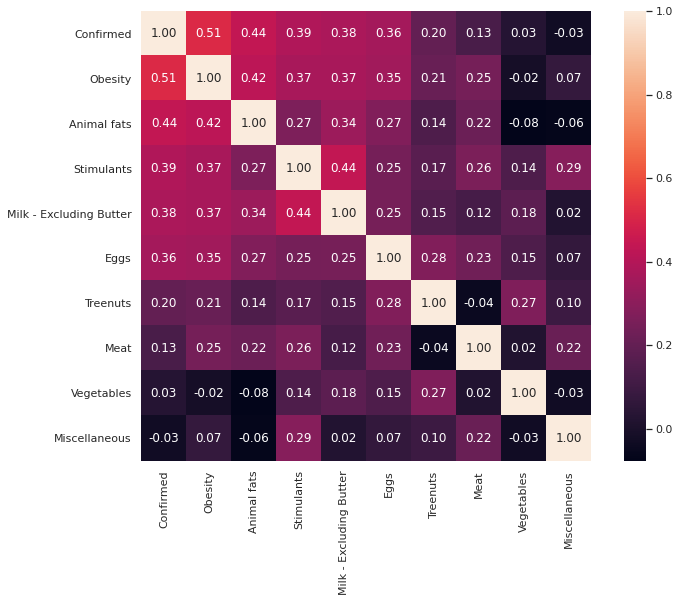

In [802]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Population",
                             "Vegetal Products", "Animal Products",
                             "Confirmed_finish", "Recovered", "Deaths_percent", "Recovered_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
X = frame_food[["Obesity"] + [name_y]]
X = frame_food
X = frame_food[columns[0:]]
X = frame_food

Y = X[name_y].values
"""
ind = Y > 80 
Y = Y[ind]
X = X[ind]

"""
"""
ind = Y > 5 
Y = Y[ind]
X = X[ind]

ind = Y < 30
Y = Y[ind]
X = X[ind]

"""
Ynorm = (Y - np.mean(Y))/np.std(Y)
Ynorm = np.clip(Ynorm, -1, 1)

Xnorm = (X - np.mean(X))/np.std(X)
Xnorm = Xnorm.drop(columns=[name_y]) 

#Xnorm = np.clip(Xnorm, -1, 1)
from sklearn.model_selection import train_test_split # Import train_test_split function

#X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10)


#model = XGBRegressor()
#model.fit(Xnorm, Ynorm, verbose=True)


In [803]:
def reg_gretl(Xnorm, Ynorm):
    df=pd.DataFrame()
    
    Xnorm = Xnorm.copy()
    list_rem = []
    for i in range(300):
        maxx = -10000
        new = sm.OLS( Ynorm, Xnorm)
        new = new.fit()
        for name_colum, value in new.pvalues.iteritems():
            if maxx < value:
                maxx = value
                name_colum_max = name_colum
        if maxx < 0.05:
            break
        Xnorm = Xnorm.drop(columns=[name_colum_max])
        row = pd.Series({"p_value":maxx, "tvalues":new.tvalues[name_colum_max]},name=name_colum_max)
        df = df.append(row)

        print(name_colum_max, maxx, new.tvalues[name_colum_max])
        list_rem.append(name_colum_max)
    return list_rem, Xnorm.columns, new, df


In [804]:
a, aa, mol, pda = reg_gretl(Xnorm, Ynorm)
mol.summary()
pda

Aquatic Products, Other 0.7718272215403876 -0.29056001332778836
Sugar & Sweeteners 0.14638515128361912 1.4606477652529992
Alcoholic Beverages 0.3986078000678307 0.8467178893792651
Miscellaneous 0.4757107246143766 0.7151444073505355
Sugar Crops 0.4753732116391348 0.7156787919326687
Offals 0.5127249623689727 0.6562505022487671
Starchy Roots 0.5086042498958674 0.6626768059583575
Vegetables 0.7688990006839608 0.2943701356866226
Pulses 0.823401700222814 0.2235762885593247
Cereals - Excluding Beer 0.6834393795689802 0.4085898041103432
Fish, Seafood 0.8640272365394945 0.17155001287131513
Meat 0.7245141755059532 0.3531022895319182
Oilcrops 0.8234564003525908 0.2234950020400756
Spices 0.6997657591086213 0.386375974504704
Fruits - Excluding Wine 0.41740668174857465 0.8131598976063393
Treenuts 0.32120375115429595 0.9952348774163288


,p_value,tvalues
"Aquatic Products, Other",0.771827,-0.290560
Sugar & Sweeteners,0.146385,1.460648
Alcoholic Beverages,0.398608,0.846718
Miscellaneous,0.475711,0.715144
Sugar Crops,0.475373,0.715679
Offals,0.512725,0.656251
Starchy Roots,0.508604,0.662677
Vegetables,0.768899,0.294370
Pulses,0.823402,0.223576
Cereals - Excluding Beer,0.683439,0.408590


In [805]:
mol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.466
Model:                            OLS   Adj. R-squared (uncentered):              0.445
Method:                 Least Squares   F-statistic:                              22.25
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                    9.78e-19
Time:                        00:14:02   Log-Likelihood:                         -124.31
No. Observations:                 159   AIC:                                      260.6
Df Residuals:                     153   BIC:                                      279.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal fats                 0.1988      0.052      3.856      0.000       0.097       0.301
Eggs                        0.1386      0.047      2.951      0.004       0.046       0.231
Milk - Excluding Butter     0.1136      0.052      2.175      0.031       0.010       0.217
Stimulants                  0.1111      0.051      2.191      0.030       0.011       0.211
Vegetable Oils              0.1213      0.052      2.342      0.020       0.019       0.224
Obesity                     0.2022      0.053      3.800      0.000       0.097       0.307
==============================================================================
Omnibus:                        1.689   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.392
Skew:                           0.033   Prob(JB):                        0.499
Kurtosis:                       2.546   Cond. No.                         2.63
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [708]:
new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              21.52
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    5.43e-20
Time:                        22:30:06   Log-Likelihood:                         -134.23
No. Observations:                 159   AIC:                                      282.5
Df Residuals:                     152   BIC:                                      303.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Aquatic Products, Other     -0.0986      0.047     -2.121      0.036      -0.191      -0.007
Cereals - Excluding Beer    -0.2646      0.052     -5.051      0.000      -0.368      -0.161
Fish, Seafood               -0.1937      0.050     -3.866      0.000      -0.293      -0.095
Offals                      -0.1648      0.050     -3.302      0.001      -0.263      -0.066
Oilcrops                    -0.2022      0.050     -4.021      0.000      -0.302      -0.103
Pulses                      -0.1500      0.052     -2.897      0.004      -0.252      -0.048
Vegetable Oils              -0.2090      0.049     -4.272      0.000      -0.306      -0.112
==============================================================================
Omnibus:                        1.074   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                1.130
Skew:                           0.191   Prob(JB):                        0.568
Kurtosis:                       2.845   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#p petit bien

In [653]:
Xnorm

,"Aquatic Products, Other",Cereals - Excluding Beer,"Fish, Seafood",Offals,Oilcrops,Pulses,Vegetable Oils
85,-0.110340,1.435469,0.941848,0.614375,0.669840,-0.349724,-1.362701
160,-0.110340,-0.072977,-0.402781,-1.350075,1.376199,2.026287,1.233204
166,-0.110340,-0.226913,0.324409,1.608424,0.331813,-0.510482,-1.984106
24,-0.110340,1.533976,4.391602,-0.148459,1.357586,0.019485,-1.142210
139,-0.110340,-0.423093,1.884715,-0.920926,3.479944,0.677523,-1.064071
150,-0.110340,1.780675,-0.038585,-0.571477,0.138559,0.029130,-0.431935
49,-0.110340,-0.907535,0.704111,-0.522431,1.530202,0.085932,-0.153954
112,-0.110340,2.465959,-0.752779,0.257919,2.673139,3.142218,-1.238386
149,-0.110340,-0.590523,1.063392,-0.532065,0.415775,-0.444303,0.208723
30,2.224050,-0.571717,0.171523,2.839818,-0.297327,-0.652754,-1.228092


In [620]:
new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.344
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              20.28
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    1.87e-13
Time:                        19:39:52   Log-Likelihood:                         -155.51
No. Observations:                 159   AIC:                                      319.0
Df Residuals:                     155   BIC:                                      331.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal fats                 0.2474      0.057      4.376      0.000       0.136       0.359
Milk - Excluding Butter     0.1296      0.060      2.162      0.032       0.011       0.248
Stimulants                  0.1302      0.059      2.221      0.028       0.014       0.246
Eggs                        0.1600      0.055      2.907      0.004       0.051       0.269
==============================================================================
Omnibus:                        0.808   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.870
Skew:                           0.048   Prob(JB):                        0.647
Kurtosis:                       2.651   Cond. No.                         1.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [824]:
res = mol.predict()

In [596]:
for i in new.pvalues.iteritems():
    print(i)

('Animal fats', 0.0005105567316297484)
('Milk - Excluding Butter', 0.018434020798189593)
('Stimulants', 0.057145124267284506)
('Eggs', 0.017137847751108767)
('Meat', 0.05516987421430633)
('Treenuts', 0.15903365328949448)
('Miscellaneous', 0.5886102763063898)
('Vegetables', 0.11629608234866838)
('Fruits - Excluding Wine', 0.6285352822104258)


In [588]:
min(new.pvalues)

0.0005105567316297484

In [698]:
new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              21.52
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    5.43e-20
Time:                        22:24:48   Log-Likelihood:                         -134.23
No. Observations:                 159   AIC:                                      282.5
Df Residuals:                     152   BIC:                                      303.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Aquatic Products, Other     -0.0986      0.047     -2.121      0.036      -0.191      -0.007
Cereals - Excluding Beer    -0.2646      0.052     -5.051      0.000      -0.368      -0.161
Fish, Seafood               -0.1937      0.050     -3.866      0.000      -0.293      -0.095
Offals                      -0.1648      0.050     -3.302      0.001      -0.263      -0.066
Oilcrops                    -0.2022      0.050     -4.021      0.000      -0.302      -0.103
Pulses                      -0.1500      0.052     -2.897      0.004      -0.252      -0.048
Vegetable Oils              -0.2090      0.049     -4.272      0.000      -0.306      -0.112
==============================================================================
Omnibus:                        1.074   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                1.130
Skew:                           0.191   Prob(JB):                        0.568
Kurtosis:                       2.845   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [576]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)


NameError: name 'y' is not defined

In [806]:
model = XGBRegressor()
model.fit(X_train, Y_train, verbose=True, eval_set=[(X_test,Y_test)])


[0]	validation_0-rmse:0.80432
[1]	validation_0-rmse:0.65222
[2]	validation_0-rmse:0.60106
[3]	validation_0-rmse:0.54618
[4]	validation_0-rmse:0.51432
[5]	validation_0-rmse:0.50986
[6]	validation_0-rmse:0.48216
[7]	validation_0-rmse:0.48643
[8]	validation_0-rmse:0.47844
[9]	validation_0-rmse:0.47589
[10]	validation_0-rmse:0.47433
[11]	validation_0-rmse:0.47839
[12]	validation_0-rmse:0.47639
[13]	validation_0-rmse:0.47784
[14]	validation_0-rmse:0.47585
[15]	validation_0-rmse:0.47470
[16]	validation_0-rmse:0.47291
[17]	validation_0-rmse:0.47467
[18]	validation_0-rmse:0.47420
[19]	validation_0-rmse:0.47370
[20]	validation_0-rmse:0.47293
[21]	validation_0-rmse:0.47251
[22]	validation_0-rmse:0.47162
[23]	validation_0-rmse:0.47147
[24]	validation_0-rmse:0.47148
[25]	validation_0-rmse:0.47154
[26]	validation_0-rmse:0.47195
[27]	validation_0-rmse:0.47206
[28]	validation_0-rmse:0.47196
[29]	validation_0-rmse:0.47195
[30]	validation_0-rmse:0.47192
[31]	validation_0-rmse:0.47184
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [810]:
frame_food["Obesity"].describe()

count    159.000000
mean      18.359748
std        9.194330
min        2.100000
25%        8.500000
50%       20.900000
75%       25.650000
max       37.300000
Name: Obesity, dtype: float64

In [811]:
np.median(frame_food["Obesity"])

20.9

import pickle


with open('model_perfimpressive.pkl', 'wb') as handle:
    pickle.dump(model, handle)
with open('Xtrainperfimpressive.pkl', 'wb') as handle:
    pickle.dump(X_train, handle)
with open('Ytrainperfimpressive.pkl', 'wb') as handle:
    pickle.dump(Y_train, handle)
with open('Xtestperfimpressive.pkl', 'wb') as handle:
    pickle.dump(X_test, handle)
with open('Ytestperfimpressive.pkl', 'wb') as handle:
    pickle.dump(Y_test, handle)


In [812]:
res = model.predict(X_test) 
for pred, TrueY in zip(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y)):
    print("pred :", pred, "TrueY :", TrueY)


pred : 1.1175094 TrueY : 2.149450199170645
pred : 0.36566865 TrueY : 0.451424397370343
pred : 1.4748857 TrueY : 2.149450199170645
pred : 0.29133826 TrueY : 0.37606610635055293
pred : 0.45313942 TrueY : 0.00034520850593755537
pred : 0.08460289 TrueY : 0.0022761760242792084
pred : 0.019474208 TrueY : 0.03324072955670976
pred : 0.81754005 TrueY : 0.15371709221805296
pred : 0.48830575 TrueY : 0.09444444444444444
pred : 1.6209768 TrueY : 1.13782810087494
pred : 0.9965102 TrueY : 1.26977929831623
pred : 1.3836377 TrueY : 1.32624795468848
pred : 0.15949231 TrueY : 0.162382132397902
pred : 1.3603348 TrueY : 2.149450199170645
pred : 1.415061 TrueY : 0.20734476502604304
pred : 0.12183356 TrueY : 0.0022377622377622863


In [813]:
#res = model.predict(Xnorm) 
for pred, TueY in zip(res * np.std(Y) + np.mean(Y) , Y):
    print("pred :", pred, "TrueY :", TueY)


pred : 1.1175094 TrueY : 0.000345208505937586
pred : 0.36566865 TrueY : 0.00085211102554659
pred : 1.4748857 TrueY : 0.00135122493737592
pred : 0.29133826 TrueY : 0.00196167000064529
pred : 0.45313942 TrueY : 0.00223776223776224
pred : 0.08460289 TrueY : 0.00227617602427921
pred : 0.019474208 TrueY : 0.00390625
pred : 0.81754005 TrueY : 0.0055025011368804
pred : 0.48830575 TrueY : 0.00584362882135449
pred : 1.6209768 TrueY : 0.006553549845441871
pred : 0.9965102 TrueY : 0.00698383960303091
pred : 1.3836377 TrueY : 0.0095751614623452
pred : 0.15949231 TrueY : 0.0127732861311773
pred : 1.3603348 TrueY : 0.0150252900922345
pred : 1.415061 TrueY : 0.0199150659226705
pred : 0.12183356 TrueY : 0.0238840199852568


In [661]:
from sklearn.metrics import mean_squared_error
res = model.predict() 


mean_squared_error(res, Y_test )

TypeError: predict() missing 1 required positional argument: 'data'

0.2968278054712682


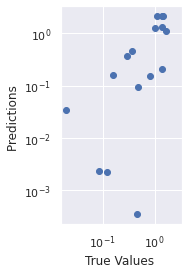

In [815]:
res = model.predict(X_test) 

print(mean_squared_error(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y)))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

In [816]:
from sklearn.metrics import r2_score
26.614440790425274


26.614440790425274

0.3728004945248105
-0.1459707710431084


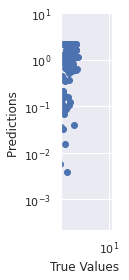

In [825]:
#res = model.predict(Xnorm) 
res = mol.predict()
print(mean_squared_error(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)))
print(r2_score(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

# K-Fold

In [818]:
kfold = KFold(n_splits=10, random_state=21)
model = XGBRegressor()
  
cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % ("Xgboost", cv_results.mean(), cv_results.std())
print(msg)



Xgboost: -0.414756 (0.245636)


In [819]:
pred = []
for ind in range(len(Xnorm)):
    model = XGBRegressor()
    
    
    dataX = np.delete(Xnorm.values, ind, axis=0)
    dataY = np.delete(Ynorm, ind, axis=0)
    print(dataX.shape, dataY.shape)
    model.fit(dataX, dataY, verbose=False, eval_set=[(Xnorm.values[ind].reshape(1, -1), Ynorm[ind].reshape(1, -1))])
    pred.append(model.predict(Xnorm.values[ind].reshape(1, -1))[0])
    


(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158

In [820]:
import random
indexes = list(range(len(Xnorm)))
random.shuffle(indexes)


nb_split = 10

length = len(Xnorm)
middle_index = length//nb_split
prec = 0
list_ind = []
for i in range (1,nb_split):
    print(prec, middle_index*i)
    list_ind.append(indexes[prec : middle_index*i])
    prec = middle_index*i
list_ind.append(indexes[prec : ])


0 15
15 30
30 45
45 60
60 75
75 90
90 105
105 120
120 135


In [821]:

scores = []
Xnorm_nu = Xnorm.values
for i in range(len(list_ind)):
    model = XGBRegressor()
    sub = Xnorm.iloc[list_ind[i]].index
    print(np.delete(Ynorm, list_ind[i], axis=0).shape, np.delete(Ynorm, list_ind[i], axis=0).shape, Xnorm_nu[list_ind[i]].shape, Ynorm[list_ind[i]].shape)
    
    model.fit(np.delete(Xnorm_nu, list_ind[i], axis=0), np.delete(Ynorm, list_ind[i], axis=0), 
             verbose=False, eval_set=[(Xnorm_nu[list_ind[i]], Ynorm[list_ind[i]])])
    print(Xnorm_nu[list_ind[i]].shape, Ynorm[list_ind[i]].shape)

    scores.append(model.predict(Xnorm_nu[list_ind[i]]))

        
        


(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(144,) (144,) (15, 22) (15,)
(15, 22) (15,)
(135,) (135,) (24, 22) (24,)
(24, 22) (24,)


0.4104697306328727
0.30791448873475846


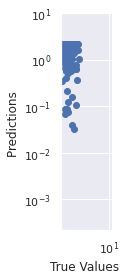

In [822]:
res = np.concatenate(scores)
TrueresY = Ynorm[indexes] 
print(mean_squared_error(res * np.std(Y) + np.mean(Y), TrueresY * np.std(Y) + np.mean(Y)))
print(mean_squared_error(res, TrueresY))
g = plt.scatter(res * np.std(Y) + np.mean(Y), TrueresY * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ') 
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

In [ ]:
5 plus obése
les 10 0.4571549260710245

In [219]:
0.000699

0.000699

# LeavOneOut

In [823]:
kfold = KFold(n_splits=10, random_state=21)
kfold = LeaveOneOut()
model = XGBRegressor()
  
cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % ("Xgboost", cv_results.mean(), cv_results.std())
print(msg)



Xgboost: -0.347664 (0.520521)


In [571]:
pred = []
for ind in range(len(Xnorm)):
    model = XGBRegressor()
    
    
    dataX = np.delete(Xnorm.values, ind, axis=0)
    dataY = np.delete(Ynorm, ind, axis=0)
    print(dataX.shape, dataY.shape)
    model.fit(dataX, dataY, verbose=False, eval_set=[(Xnorm.values[ind].reshape(1, -1), Ynorm[ind].reshape(1, -1))])
    pred.append(model.predict(Xnorm.values[ind].reshape(1, -1))[0])


(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158,)
(158, 22) (158

In [572]:
pred = np.array(pred)
pred

array([-0.76147616, -1.1134541 , -0.4900741 , -0.7635999 , -0.34317023,
       -0.9122896 ,  0.34730357, -0.9284092 , -0.1278696 ,  0.60055286,
       -0.7948233 , -0.73094046, -0.82853365, -0.13937908, -0.75404954,
       -1.0570239 , -1.0529083 , -0.9892744 , -0.91154826,  0.7596813 ,
       -1.0977778 , -0.79699993, -0.9977703 , -0.37113822, -0.95709264,
        0.7781621 ,  0.55033046, -0.52574646, -1.0303342 , -0.9027214 ,
       -0.49263322, -0.97785974, -0.7656938 ,  0.384703  , -0.14082891,
       -0.36011255, -0.9631971 , -0.4396984 , -0.9590838 ,  0.34518927,
       -0.61534715, -0.9035374 , -0.00491786,  0.18245956, -0.993736  ,
       -0.90913093, -0.5928838 ,  0.5424359 , -0.97552514, -0.6846001 ,
        0.7263692 ,  0.03326511,  0.36057237,  0.60819757, -0.6089777 ,
       -0.7389791 , -0.94578874,  0.21285287, -0.82015955, -0.21638167,
        0.36548263, -0.93867266, -0.4035095 , -0.7428659 , -0.17818487,
        0.38858458, -0.5263233 ,  0.5013775 ,  0.21319568,  0.70

33.40167927837659
0.3976199145125788


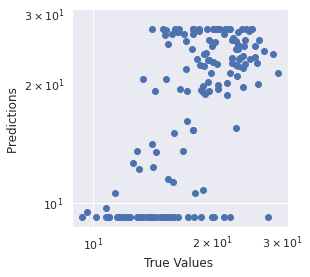

In [615]:
#res = pred

print(mean_squared_error(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)))
print(mean_squared_error(res, Ynorm ))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

In [380]:
res = np.array([ 0.5567726 , -0.32847625,  0.38787413,  0.5401288 ,  0.15690306,
       -0.00799358, -0.12282896, -0.274454  ,  0.5754272 ,  0.06440553,
       -0.25211132, -0.69880307,  0.8411999 , -0.47329062,  0.49638128,
       -0.3227728 , -0.22422397,  0.61703575,  0.7609999 ,  0.659103  ,
        0.37184626, -0.24540603,  0.12609187,  0.0460965 ,  0.45212683,
       -0.41548514,  0.18387946, -0.08859199, -0.2632379 ,  0.20842159,
        0.14747098, -0.1093241 , -0.18214744,  0.9349283 ,  0.05300519,
        0.23584196,  0.5368841 ,  0.5192152 ,  0.30376738,  0.6587344 ,
        0.4528335 , -0.47794372,  0.6068746 , -0.04177076,  0.29716623,
       -0.18484694,  0.6506715 , -0.47741926, -0.2153796 ,  0.08775389,
        0.3153552 , -0.01400584, -0.27642924, -0.21842563,  0.07662106,
       -0.10583144,  0.53684133,  0.13883352,  0.42796397, -0.25244796,
        0.39189887, -0.5348698 , -0.27320367,  0.77602845,  0.7684442 ,
        0.8375721 ,  0.07689795, -0.03689677,  0.98066866, -0.2738089 ,
       -0.50807333,  1.0353422 , -0.12372267,  0.91865057, -0.31719667,
       -0.7006681 ,  0.12585574,  0.03887028,  0.4257396 ,  0.01889354,
        0.3793853 ,  0.26714104, -0.49219793,  0.7089625 ,  0.04213795,
        0.09579027,  0.08302984, -0.04583329, -0.00928903,  0.15266332,
       -0.43733573, -0.19347507,  0.370792  , -0.70451486, -0.37772816,
        0.00364625,  0.16994631, -0.49193352,  0.19976944,  0.10294494,
        0.72636086,  0.16431051,  0.36402887,  0.08049583,  0.31446898,
       -0.6613674 ,  0.45120627, -0.6951158 , -0.3571096 ,  0.21086022,
       -0.15353054, -0.25798875, -0.4433009 ,  0.32971132,  0.79287255,
       -0.11413658,  0.34052455,  0.5509259 ,  0.09418455, -0.32146752,
       -0.1749444 ,  0.4161052 ,  0.69021213,  0.05519637, -0.30767733,
       -0.35628092,  0.47994274,  0.18223608, -0.05520588,  0.06571096,
        0.66650754, -0.29556507,  0.5852767 ,  0.5020147 , -0.04695213,
        0.16154236,  0.2834322 , -0.03697646, -0.32694477, -0.0792262 ,
        0.907678  ,  0.32811904,  0.46908927, -0.1320625 , -0.03892547,
        0.23525533,  0.21136323,  0.10855356,  0.01091471,  0.05249211,
        0.1940577 ])

In [383]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(res, Ynorm)
coefficient_of_dermination

-1.9850724605201302

In [301]:
df = pd.DataFrame()
for res, TrueY in zip(pred * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)):
        line = {"pred :": res, "TrueY :": TrueY}
        df = df.append(line, ignore_index=True)
df

,TrueY :,pred :
0,99.420042,98.441391
1,95.004028,96.486755
2,96.980155,98.068466
3,99.420042,98.404648
4,99.420042,97.558479
5,99.420042,97.194389
6,95.004028,96.940826
7,95.004028,96.606041
8,98.421883,98.482582
9,95.004028,97.354240


In [300]:
df[""]

""


In [ ]:
0.461235

In [117]:
0.003704601354095966

0.003704601354095966

In [118]:
Xnorm


,Miscellaneous,Spices,Fruits - Excluding Wine,Stimulants,Vegetables,Starchy Roots,"Fish, Seafood",Oilcrops,Milk - Excluding Butter
160,-0.971773,-0.306379,-0.465425,-0.930633,-0.313225,1.947809,-0.423385,2.642489,-0.957977
150,1.164238,-0.255652,2.074696,-0.675293,-0.727315,-0.073323,0.276619,0.556457,-1.711900
49,-0.468504,-0.302831,-0.923233,-0.318380,-0.692026,0.598636,1.704124,2.902060,-1.187456
30,1.942192,-0.528439,-0.552650,0.416206,1.530603,-0.529054,0.680460,-0.178224,-1.050969
22,-0.687484,-0.427696,-1.021053,-0.939085,-1.280353,-0.602631,-0.605155,4.188507,-1.067835
96,-0.493476,-0.326953,-0.394215,-0.922774,0.457058,-0.243002,-0.526864,0.487837,1.381343
136,-0.255288,0.256577,-0.487108,-0.861386,-0.156632,0.938369,1.163221,1.127150,-1.056158
89,-0.278338,-0.768237,-0.774162,-0.797922,-0.601599,0.411313,-0.603057,-0.288327,-1.690525
59,1.461973,2.354448,5.876377,0.323975,-1.053183,-0.479501,1.318334,0.462818,-0.206390
113,-0.777765,0.915310,-0.284322,-0.912098,1.359122,3.996720,-0.129740,0.926736,-1.618941


In [119]:
type(Xnorm)

pandas.core.frame.DataFrame

In [384]:
Xnorm

,Animal fats,Obesity,Milk - Excluding Butter,Eggs,Meat,Treenuts,Stimulants,"Aquatic Products, Other",Alcoholic Beverages
85,-0.037318,-1.442893,-1.448727,-0.675910,1.345341,-0.764911,-0.793214,-0.117262,-0.119226
166,-0.078003,-1.698843,-1.293816,-0.243463,3.882548,0.508034,-0.786530,-0.117262,-0.119226
24,-0.960096,-1.549539,-1.331157,-0.575534,0.622427,-0.492293,-0.816403,-0.117262,-0.119226
139,-0.183378,0.263438,-1.292847,-0.982472,-0.542994,-0.481803,0.438540,-0.117262,-0.119226
150,-0.614868,-1.613527,-1.462349,-1.057490,1.239454,-0.830846,-0.626661,-0.117262,-0.119226
49,1.081508,1.276572,-0.987692,-0.555308,-0.124632,-0.674307,-0.298330,-0.117262,-0.119226
112,-0.428002,-1.421564,-0.246600,-1.339146,-1.190576,-0.843641,-0.860053,-0.117262,-0.119226
149,-0.725433,-0.771026,-1.084919,2.944720,0.596212,-0.538517,-0.729648,-0.117262,-0.119226
30,-0.191119,-1.218937,-0.864162,2.054920,2.809216,1.228827,0.377430,2.082735,-0.119226
28,-0.287342,-1.410900,-0.213868,-1.320882,-0.251127,-0.843641,-0.863736,-0.117262,-0.119226


In [385]:
Ynorm

array([-1.        ,  0.18628239, -1.        , -1.        , -1.        ,
        1.        ,  1.        , -0.56794731,  1.        ,  1.        ,
        0.00701213, -1.        ,  0.96764839, -0.5355895 ,  0.64719819,
        1.        ,  0.32886817, -0.42192906,  0.16036188, -0.43301527,
       -0.21261843, -0.73065042, -0.92470705,  1.        , -0.90992651,
       -0.41396269,  0.22329028, -0.6169828 , -0.45512286, -1.        ,
       -1.        ,  0.11378893, -1.        , -0.36121292,  0.50381972,
        0.09509009, -0.12822927, -0.28831829, -1.        , -0.30157248,
        0.35425397, -0.45844274, -1.        ,  0.26515364,  0.40283237,
        1.        ,  0.93611491, -0.36893927, -0.42765651, -0.0517166 ,
        0.33142974, -0.94523106,  0.98439432, -1.        , -0.25801131,
       -0.26185868,  0.547428  , -0.93603285, -0.48434537,  0.00786831,
       -0.91617733,  0.7823431 , -0.14524767, -0.30560375, -1.        ,
       -1.        , -0.34128248, -0.49926653,  0.26215159, -0.84

In [121]:
for ind in range(len(X)):
    dataX = np.delete(X, ind, axis=0)
    dataY = np.delete(Y, ind, axis=0)
    try:
        model.fit(X_train, Y_train, verbose=True, eval_set=[(X_test,Y_test)])
        pred.append(model.predict(X[ind].reshape(1, -1))[0])
    except:
        pred = [-1 for i in Y]

ValueError: Shape of passed values is (111, 10), indices imply (112, 10)